<a href="https://colab.research.google.com/github/sheamusfitz/DSPS_jFitzgerald/blob/master/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW7
## Responses by Shea Fitzgerald
## Part 1

### 1: Obtaining Data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [106]:
!pip install emcee

     |████████████████████████████████| 61kB 2.3MB/s 


In [0]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as pl
import numpy as np
import statsmodels.formula.api as smf
import emcee

In [3]:
!mkdir "/content/drive/My Drive/dsps/HW7/"

mkdir: cannot create directory ‘/content/drive/My Drive/dsps/HW7/’: File exists


In [4]:
cd "/content/drive/My Drive/dsps/HW7/"

/content/drive/My Drive/dsps/HW7


In [5]:
ls

fig1g.txt  try3


In [6]:
!wget -O fig1g.txt 'https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ' -nc

File ‘fig1g.txt’ already there; not retrieving.


In [7]:
!head fig1g.txt

0.247	0	0.114	--	1.998	-0.6682	0.236	--		0	0
0.27	0.264431	0.291	--	3.008	0	1.64	0		1	1.62918E-4
0.29	0.247896	0.29	--	4.013	1.117	2.5	0.2		1.5	0.00793369
0.33	0.232262	0.33	--	5.006	2.476	3.999	1.538		2	0.0581891
0.379	0.23342	0.38	--	6.015	4.413	5	2.866		2.5	0.198115
0.43	0.270713	0.43	--	7.016	6.788	6	4.529		3	0.457108
0.48	0.397126	0.48	--	8.019	8.708	7	6.788		3.5	0.842057
0.53	0.356825	0.53	--	9.003	11.058	8	9.067		4	1.34564
0.619	0.423466	0.619	--	10.022	14.668	9	11.417		4.5	1.95456
0.779	0.54455	0.779	--	15.131	25.198	10	13.677		5	2.65456


In [145]:
nam18 = pd.read_csv("fig1g.txt", sep="\t", header=None)
nam18.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247,0.000000,0.114,--,1.998,-0.6682,0.236,--,NaN,0.0,0.000000
1,0.270,0.264431,0.291,--,3.008,0.0000,1.640,0,NaN,1.0,0.000163
2,0.290,0.247896,0.290,--,4.013,1.1170,2.500,0.2,NaN,1.5,0.007934
3,0.330,0.232262,0.330,--,5.006,2.4760,3.999,1.538,NaN,2.0,0.058189
4,0.379,0.233420,0.380,--,6.015,4.4130,5.000,2.866,NaN,2.5,0.198115


### 2: Data Wrangling and Visualization

In [0]:
# nam18wo8 = nam18.drop(8, axis=1)
# # nam18wo8
# pd.plotting.scatter_matrix(nam18wo8, figsize=(15,10));

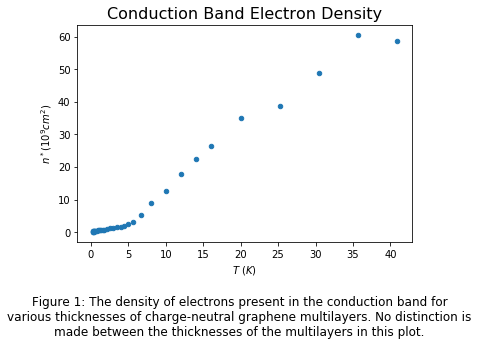

In [203]:
nam18 = pd.read_csv("fig1g.txt", sep="\t", header=None)
tstr = r'$T\ (K)$'
nstr = r'$n^*(10^9cm^2)$'
nam18 = nam18.drop(labels = range(2,11), axis=1).dropna().rename(
    columns = {0:tstr, 1:nstr})
nam18.plot(x=0, y=1, kind='scatter')
pl.title('Conduction Band Electron Density', fontsize = 16)
txt='Figure 1: The density of electrons present in the conduction band for\n\
various thicknesses of charge-neutral graphene multilayers. No distinction is\n\
made between the thicknesses of the multilayers in this plot.'
pl.figtext(0.5, -0.2, txt, ha='center', fontsize = 12, wrap = True);


0;

In [172]:
nam18.head()

,$T\ (K)$,$n^*(10^9cm^2)$
0,0.247,0.000000
1,0.270,0.264431
2,0.290,0.247896
3,0.330,0.232262
4,0.379,0.233420


Trying to do `inplace = True` for multiple functions at once causes issues, this works instead.

### 667

In [0]:
def anypol(x, *coeffs):
    """
    given some { x = [x1,x2,x3,x4,x5,...], a, b, c, d ... } anypol returns
    a + b x + c x^2 + d x^3 + ... as an array
    i.e. it returns the y-values associated with each given x-velue


    x is some array or list of values.

    a, b, c, d, ... are coefficients of the polynomial in increasing degree
    """
    func = 0
    for i in range(len(coeffs)):
        func += coeffs[i] * np.power(x, i)
    return func

In [0]:
lopt, lcov = sp.optimize.curve_fit(anypol, nam18[tstr], nam18[nstr], p0=[1,1])
qopt, qcov = sp.optimize.curve_fit(anypol, nam18[tstr], nam18[nstr], p0=[1,1,1])
copt, ccov = sp.optimize.curve_fit(anypol, nam18[tstr], nam18[nstr], p0=[1,1,1,1])

### 3. Model

In [175]:
# model1 = smf.ols('nstr ~ tstr', data=nam18).fit()
# I can't figure out why the above won't work

model_lin = smf.ols('nam18[nstr] ~ nam18[tstr]', data=nam18).fit()
model_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nam18[nstr]   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.03e-30
Time:                        23:27:58   Log-Likelihood:                -78.878
No. Observations:                  35   AIC:                             161.8
Df Residuals:                      33   BIC:                             164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.8884      0.492     -3.841      0.001      -2.889      -0.888
nam18[tstr]     1.6176      0.038     42.577      0.000       1.540       1.695
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.041
Skew:                          -0.420   Prob(JB):                        0.594
Kurtosis:                       2.905   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
model_quad = smf.ols('nam18[nstr] ~ np.power(nam18[tstr], 2) + nam18[tstr]', data=nam18).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nam18[nstr]   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     879.5
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.08e-28
Time:                        23:27:58   Log-Likelihood:                -78.866
No. Observations:                  35   AIC:                             163.7
Df Residuals:                      32   BIC:                             168.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.9344      0.592     -3.266      0.003      -3.141      -0.728
np.power(nam18[tstr], 2)    -0.0005      0.004     -0.144      0.886      -0.008       0.007
nam18[tstr]                  1.6354      0.129     12.652      0.000       1.372       1.899
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.984
Skew:                          -0.399   Prob(JB):                        0.611
Kurtosis:                       2.809   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
model_cub = smf.ols('nam18[nstr] ~ np.power(nam18[tstr], 3)\
 + np.power(nam18[tstr], 2) + nam18[tstr]', data=nam18).fit()
model_cub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nam18[nstr]   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1433.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           2.54e-33
Time:                        23:27:59   Log-Likelihood:                -62.858
No. Observations:                  35   AIC:                             133.7
Df Residuals:                      31   BIC:                             139.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4186      0.441     -0.949      0.350      -1.318       0.481
np.power(nam18[tstr], 3)    -0.0015      0.000     -6.811      0.000      -0.002      -0.001
np.power(nam18[tstr], 2)     0.0827      0.012      6.649      0.000       0.057       0.108
nam18[tstr]                  0.5900      0.175      3.380      0.002       0.234       0.946
==============================================================================
Omnibus:                        3.084   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                1.813
Skew:                          -0.397   Prob(JB):                        0.404
Kurtosis:                       3.784   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
print("The linear model's log-likelihood:\t{:0.5f}".format(model_lin.llf))
print("The quadratic model's log-likelihood:\t{:0.5f}".format(model_quad.llf))
print("The cubic model's log-likelihood:\t{:0.5f}".format(model_cub.llf))

The linear model's log-likelihood:	-78.87785
The quadratic model's log-likelihood:	-78.86649
The cubic model's log-likelihood:	-62.85756


### 4 Plot

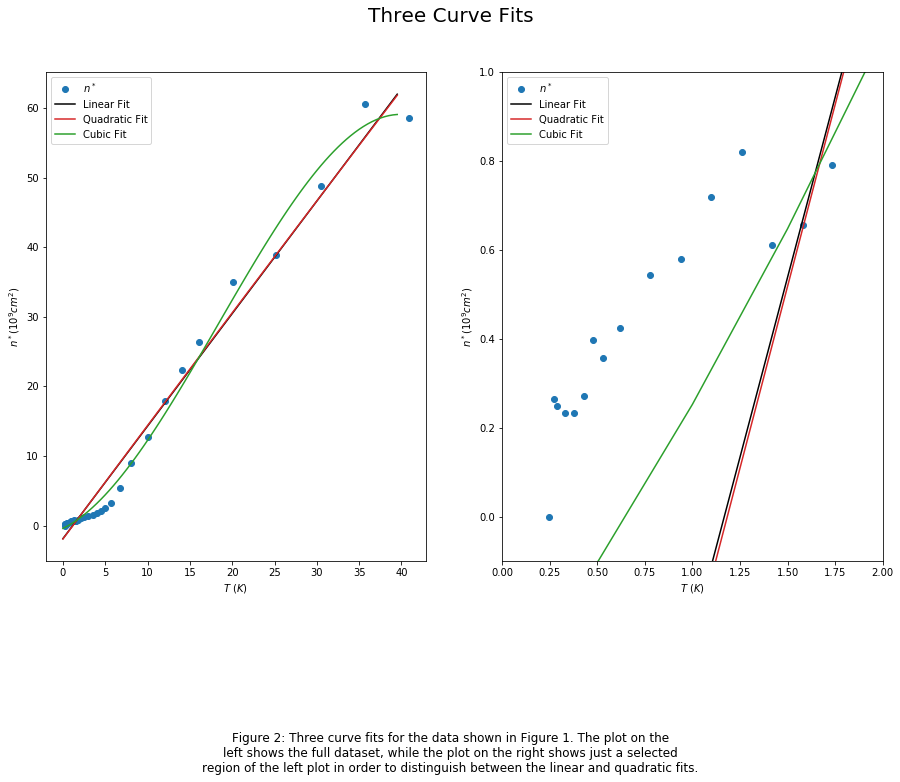

In [207]:
xarr = np.arange(0, 40, 0.5)

pl.figure(figsize=(15, 9))
pl.suptitle('Three Curve Fits', fontsize=20)

pl.subplot(121)
pl.plot(nam18[tstr] , nam18[nstr], '.', ms=12, label = '$n^*$')
pl.plot(xarr, anypol(xarr, *lopt), c='k', label = 'Linear Fit')
pl.plot(xarr, anypol(xarr, *qopt), c='C3', label = 'Quadratic Fit')
pl.plot(xarr, anypol(xarr, *copt), c='C2', label = 'Cubic Fit')
pl.legend()
pl.ylabel(nstr)
pl.xlabel(tstr)

txt='Figure 2: Three curve fits for the data shown in Figure 1. The plot on the\n\
 left shows the full dataset, while the plot on the right shows just a selected\n\
 region of the left plot in order to distinguish between the linear and quadratic fits.'
pl.figtext(0.5, -0.2, txt, ha='center', fontsize = 12, wrap = True);

pl.subplot(122)
pl.plot(nam18[tstr] , nam18[nstr], '.', ms=12, label = '$n^*$')
pl.plot(xarr, anypol(xarr, *lopt), c='k', label =  'Linear Fit')
pl.plot(xarr, anypol(xarr, *qopt), c='C3', label = 'Quadratic Fit')
pl.plot(xarr, anypol(xarr, *copt), c='C2', label = 'Cubic Fit')
pl.xlim(0,2)
pl.ylim(-.1,1)
pl.legend()
pl.ylabel(nstr)
pl.xlabel(tstr)

0;

### 5 *Formal* comparison of the models

Taking as our null-hypothesis that **'The simpler model is more accurate'**, testing at a confidence level of $p < 0.05$ with a Likelihood-Ratio Test, we find the following:

In [189]:
lr_3to2 = model_cub.compare_lr_test(model_quad)
lr_3to1 = model_cub.compare_lr_test(model_lin)
lr_2to1 = model_quad.compare_lr_test(model_lin)

print('model degrees, \t Likelihood Ratio, \t p-value, \t Difference in degrees of freedom')
print('2 & 3:\t\t', lr_3to2, '\n1 & 3:\t\t', lr_3to1, '\n1 & 2:\t\t', lr_2to1)

model degrees, 	 Likelihood Ratio, 	 p-value, 	 Difference in degrees of freedom
2 & 3:		 (32.01784952536279, 1.5276246887173018e-08, 1.0) 
1 & 3:		 (32.04057153068926, 1.1027531159466854e-07, 2.0) 
1 & 2:		 (0.022722005326471617, 0.8801822372588882, 1.0)


Comparing the cubic fit to both the quadratic and linear fits, we find p-values lower than $10^{-7}$. Therefore, for the cubic fit, we reject the null-hypothesis and find that the cubic fit is the best for our data. Comparing the linear to the quadratic fit, there is not enough evidence to reject the null hypothesis ($p\sim 0.88$), so we find no evidence that the quadratic fit is better than the linear fit.

Ranking the three fits from best to worst:
 
1. Cubic fit
2. Linear fit
3. Quadratic fit

